In [ ]:
import cv2
import numpy as np

# Load YOLO model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Get layer names
layer_names = net.getLayerNames()
layer_names


('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [ ]:
# Get layer names
layer_names = net.getLayerNames()

# Get unconnected output layers
output_layers = net.getUnconnectedOutLayers()
output_layers


array([200, 227, 254], dtype=int32)

In [ ]:
pip install --upgrade opencv-python


In [ ]:
classes = []
with open("coco.names", "r") as f:
    classes = f.read().strip().split('\n')

In [ ]:
# Load image
img = cv2.imread("cat.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape


In [ ]:
img

array([[[ 51,  60,  20],
        [ 50,  59,  22],
        [ 47,  59,  23],
        ...,
        [ 29,  94,  62],
        [ 25,  86,  52],
        [ 30,  85,  52]],

       [[ 53,  61,  24],
        [ 53,  60,  26],
        [ 50,  60,  27],
        ...,
        [ 35, 102,  65],
        [ 42, 108,  69],
        [ 45, 109,  70]],

       [[ 56,  63,  28],
        [ 55,  63,  29],
        [ 52,  63,  31],
        ...,
        [ 42, 111,  69],
        [ 52, 124,  79],
        [ 52, 124,  79]],

       ...,

       [[ 48,  78,  73],
        [ 45,  73,  71],
        [ 56,  79,  83],
        ...,
        [183, 199, 212],
        [178, 194, 207],
        [178, 194, 207]],

       [[ 13,  45,  39],
        [ 15,  44,  41],
        [ 57,  80,  83],
        ...,
        [179, 193, 206],
        [177, 193, 206],
        [174, 190, 203]],

       [[ 26,  69,  54],
        [ 21,  54,  48],
        [102, 122, 128],
        ...,
        [216, 226, 236],
        [192, 206, 215],
        [157, 174, 183]]

In [ ]:
# Preprocess image
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)


In [ ]:
# Get output layer indices
output_layer_indices = net.getUnconnectedOutLayers()


In [ ]:
output_layers = [layer_names[i - 1] for i in output_layer_indices]



In [ ]:
# Get detection results
outs = net.forward(output_layers)


In [ ]:
# Information to draw bounding boxes and labels on the image
class_ids = []
confidences = []
boxes = []

In [ ]:
# Process each output layer
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.5:  # Threshold for confidence
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)


In [ ]:
# Non-maximum suppression to remove duplicate detections
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)


In [ ]:
# Draw bounding boxes and labels on the image
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [ ]:
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)

In [ ]:
from google.colab.patches import cv2_imshow

# Display the image with detections
cv2_imshow(detection)
cv2.waitKey(0)
cv2.destroyAllWindows()


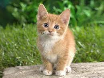

In [ ]:
from google.colab.patches import cv2_imshow

# Display the image with detections
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
